<h1><center>Week 5: Introduction to neural Networks</center></h1>

<h3><center>CSCI-UA 9473 - Introduction to Machine Learning</center></h3>



<img src="neuralNetImage.jpeg" alt="Drawing" style="width: 400px;"/>

## Perceptron learning rule

This week, we will start working with neural networks. For each of the exercises below you can use the method of your choice but you should display the final boundary of your classifier.

### Exercise 1. 
As a first exercise, load the binary dataset below and code a few steps of the perceptron learning rule. 

In [5]:
import scipy.io as sio
data1 = sio.loadmat('perceptron_data_class1.mat')
data2 = sio.loadmat('perceptron_data_class2.mat')

data1 = data1['perceptron_data_class1']
data2 = data2['perceptron_data_class2']

# put your code here

### Exercise 2.

__2a.__ Load the data below. Using the neural_network module from scikit-learn and its MLPClassifier model, learn a classifier, for the dataset below using 

- One hidden layer with a linear activation function and 
    - One neuron
    - Two neurons
    
    
    
- One hidden layer with a non linear activation function (take Relu for example or a binary step)
    - One neuron
    - Two neurons

How many neurons, hidden layers do you need to learn the distribution of the data? Do you have an idea why?

Try increasing the number of neurons and hidden layers. Then try different values of the learning rate. 


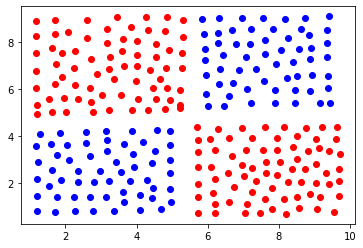

In [4]:
import scipy.io as sio
import numpy as np

data1 = sio.loadmat('data_Week6_class1_XOR.mat')
data2 = sio.loadmat('data_Week6_class2_XOR.mat')

data1 = data1['data_Week6_class1_XOR']
data2 = data2['data_Week6_class2_XOR']

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()


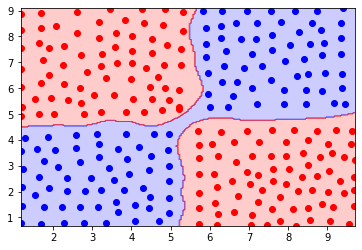

In [5]:
# put your code here
target1 = np.ones((np.shape(data1)[0], 1))
target2 = np.zeros((np.shape(data2)[0], 1))

targets = np.vstack((target1, target2))

data = np.vstack((data1, data2))


from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#0000FF", "#FF0000"])

clf = MLPClassifier(hidden_layer_sizes = (100,), activation = 'tanh', \
                    solver = 'lbfgs', learning_rate_init = .001, max_iter=10000)


# display result using meshgrid

x1min= np.min(data[:,0]) 
x1max= np.max(data[:,0])
x2min= np.min(data[:,1])
x2max=np.max(data[:,1])

x1= np.linspace(x1min, x1max, 200)
x2= np.linspace(x2min, x2max, 200)

xx1, xx2 = np.meshgrid(x1, x2)

Xprediction = np.vstack((xx1.flatten(), xx2.flatten())).T

clf.fit(data, np.squeeze(targets), )

prediction = clf.predict(Xprediction)

plt.contourf(xx1, xx2,np.reshape(prediction>1/2, np.shape(xx1)), cmap = cm_bright, alpha=.2)
plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()


__2b.__ Keep the dataset from above. try to change the intialization of the training algorithm. Plot the resulting classifier for a couple of different initializations. What do you see?

Do it for a small network first. Then repeat those experiments for larger architectures. I.e. increase the number of neurons and the number of layers. What do you see when you change the initialization?


In [ ]:
from sklearn.neural_network import MLPClassifier

# put your code here



### Exercise 3. 

__3a.__Load the data below. Try to build the best neural network you can for this dataset. Split the data between a training and a test set and evaluate the models you built. What is the best validation error you can get?

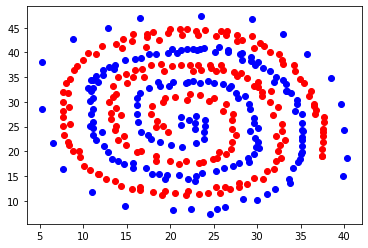

In [8]:
import matplotlib.pyplot as plt
import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']

plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()

/Users/qhk/miniforge3/envs/tensorflow_conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


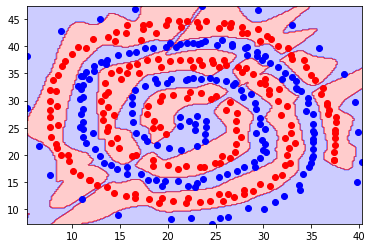

In [25]:
# put your answer here 
# put your code here
target1 = np.ones((np.shape(data1)[0], 1))
target2 = np.zeros((np.shape(data2)[0], 1))

targets = np.vstack((target1, target2))

data = np.vstack((data1, data2))


from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#0000FF", "#FF0000"])

clf = MLPClassifier(hidden_layer_sizes = (30,30),max_iter=20000,\
                           learning_rate_init=.0001, alpha = .1, solver = 'lbfgs',\
                              activation = 'tanh', random_state = 100)


# display result using meshgrid

x1min= np.min(data[:,0]) 
x1max= np.max(data[:,0])
x2min= np.min(data[:,1])
x2max=np.max(data[:,1])

x1= np.linspace(x1min, x1max, 200)
x2= np.linspace(x2min, x2max, 200)

xx1, xx2 = np.meshgrid(x1, x2)

Xprediction = np.vstack((xx1.flatten(), xx2.flatten())).T

clf.fit(data, np.squeeze(targets))

prediction = clf.predict(Xprediction)

plt.contourf(xx1, xx2,np.reshape(prediction>1/2, np.shape(xx1)), cmap = cm_bright, alpha=.2)
plt.scatter(data1[:,0], data1[:,1], c= 'r')
plt.scatter(data2[:,0], data2[:,1], c= 'b')
plt.show()


__3b.__ With the same dataset, add additional features to your model, e.g. $\sin(x), \sin(y)$ or other monomials. Can you improve your classifier ?

### Exercise 4.

Let us go back briefly to a simple dataset to make sure we understand how things work. As a first exercise, we will code a one hidden layer neural network that outputs a binary 0/1 variable indicating the class of our data. Throughout this exercise, we will use the notation $z^{\ell+1} = \sigma(a^{\ell+1})$ to denote the output of any neuron from the $(\ell+1)^{th}$ layer and where $a^{\ell+1} = \sum_{k} w_{\ell+1,k} z_k$ is the combination from the previous layer that is fed to the neuron.  



<img src="diagramNeuralNet3.png" alt="Drawing" style="width: 450px;"/>


We will use the function ['minimize'](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from scipy. Check the documentation of that function. We will set the 'jac' parameter of the optimizer to 'True', which implies that the (objective) function that we provide as an input should return both the value of the loss and the value of its gradient. 

For this first exercise, you are asked to write a function $f(W)$ wich takes as arguments a vector $W$ containing all the parameters of your network (as a first step consider building a network with only a few hidden units, in order to make sure the model is working). As indicated above, the function should return (1) the value of the binary cross entropy for the given set of weights and (2) the value of the gradient derived through Backpropagation (as we set the value of 'jac' to True). 

 We will split the writing of your function into several steps. Once you have coded each step, you should gather them together in a single $fun(W)$ body that you will then pass as input to the minimize function. 

### Exercise 4.a.

Start Load the data using the lines below and plot it using scatter()

In [ ]:
from scipy.optimize import minimize

import scipy.io as sio
data1 = sio.loadmat('pointsClass1Week6.mat')
data2 = sio.loadmat('pointsClass2Week6.mat')

from numpy import linalg as LA

data1 = data1['pointsClass1Week6']
data2 = data2['pointsClass2Week6']


# put your code here

### Exercise 4.b 

As indicated above, we want to apply the network to the simple binary dataset that you loaded above. We want to build an architecture similar to the one shown above, except that, since we only consider a 2D dataset, we only need 2 inputs. we want our activation function to be all sigmoid. Start by defining the function sigmoid and the gradient of this function. Once you are done, check your derivative. Also make sure you can compute the entrywise sigmoid on any numpy array if the input to your function is a numpy array. 

### Exercise 4.c

Now that we have the sigmoid and its gradient, we will code the loss. As you might remember from previous labs, the MLPClassifier from scikit-learn optimizes the 'log-loss function' (a.k.a Binary cross entropy) which reads for a set of $N$ prototypes $x_i$ with binary $0/1$ targets, 

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i))) $$

Here the probability $p_{W}(x_i)$ is the output of your network. Instead of minimizing this function directly, we will consider its $\ell_2$ regularized version

$$−\frac{1}{N}\sum_{i=1}^N (y_i \log(p_{W}(x_i))+(1−y_i)\log(1−p_{W}(x_i)))  + \lambda \sum_{j\in\text{weights}\setminus \text{bias}} W^2_j$$

Where the $W_j$ encode the weights. Code that function for a given labeled dataset $X,t$ such as given above, a set of weights stored in the vector $W$ (you can use a list or a dictionnary if you want but ultimately, you will need to store them in a numpy vector for use with the optimization routine).  Note that one typically does not regularize the bias terms. 

### Exercise 4.d. 

Towards Backpropagation. The example above is relatively simple so that backpropagation is not really needed. Compute the gradient of the Binary cross entropy loss with respect to the weights.  

### Exercise 4.e. 

Combine all your previous steps into a single function and pass this function to the 'minimize' routine. To choose the initial value for the weights, a common heuristic is for the n^th layer to be initialized unformly at random in the interval $[-\varepsilon_n, \varepsilon_n]$ with $\epsilon_n$ defined as $\sqrt{\frac{2}{\text{size layer}_{\ell-1} + \text{size layer}_{\ell} }}$



### Bonus 1 

Change the activation to the Relu and reapeat the steps above. How do you compute the gradient in this case?

### Exercise 5. 

Coding a One hidden layer neural network is good to warm up but to really understand backpropagation, we will not add a few hidden layers. Still relying on the code that you developed above and using backpropagation, train a depth 4 neural network with 10 neurons in each layer on the binary dataset. 

### Exercise 5a. 

In this exercise, because of the multiple layers of the network, you will get to really code backpropagation. To do this, follow the steps below 

(see [Bishop Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)) for more details.

- Take any of the sample (Once you have completed one step of backprop, you should re-apply it to the next sample to get the gradient contribution for that next sample and so on). Forward propagate that sample through the network and compute all the activations $z = \sigma(a_i)$ and input $a_i$ for each unit. 

- Evaluate the $\delta_k = y_k(x_n) - t_{n,k}$ for all the output units.

- Backpropagate the $\delta_k$ using the formula

$$\delta_j = \sigma'(a_j) \sum_{k} w_{k,j} \delta_k$$

- Finally, compute the derivatives as 

$$\frac{\partial \text{loss}}{\partial w_{ij}}  = \delta_j z_i$$

Note that when coding the backpropagation algorithm, you don't need to account for the regularization part of the loss as you can just add the gradient of the regularization to the result of the backpropagation algorithm.  


In [ ]:
from scipy.optimize import minimize


# put your code here


### Exercise 6. 

Extending to multiple classes. Load the data using the lines given below, visualize it with scatter. How can you extend the Binary cross entropy function to the multiclass problem?

In [7]:

import scipy.io as sio
data1 = sio.loadmat('xWeek6Ex3PointsClass1.mat')
data2 = sio.loadmat('xWeek6Ex3PointsClass2.mat')
data3 = sio.loadmat('xWeek6Ex3PointsClass3.mat')

from numpy import linalg as LA

data1 = data1['xWeek6Ex3PointsClass1']
data2 = data2['xWeek6Ex3PointsClass2']
data3 = data3['xWeek6Ex3PointsClass3']


# put your code here

